In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import decimal

decimal.getcontext().prec = 2

# Organização dos dados
Peguei os dados da tabela A1 disponível no paper.
Agora tenho que formatar os valores de modo que sejam legíveis aqui.

In [16]:
df = pd.read_csv('./data/table_a.csv', sep=';')
display(df.head())

,Z,L(x10^30)(ergs^-1 Hz^-1),Probability,Probability MaxEnt
0,0.49,13.70,3.32 × 10^−3,3.84 × 10^−4
1,0.49,10.42,6.336 × 10^−3,1.89 × 10^−3
2,0.49,7.90,1.00 × 10^−2,6.36 × 10^−3
3,0.49,5.60,1.55 × 10^−2,1.59 × 10^−2
4,0.49,4.55,2.83 × 10^−2,3.20 × 10^−2


In [17]:
probability = df['Probability']
formated_probability = []
for p in probability:
    values = p.split(' × ')
    expo = int(values[1].split('^')[1].replace('−', '-').replace(' ', ''))
    multiplier = 10 ** expo
    new_value = round(float(values[0]) * multiplier, abs(expo) + 3) # 3 is the max number of digits after the comma
    formated_probability.append(new_value)
    
df['Probability'] = formated_probability

display(df.head())

,Z,L(x10^30)(ergs^-1 Hz^-1),Probability,Probability MaxEnt
0,0.49,13.70,0.003320,3.84 × 10^−4
1,0.49,10.42,0.006336,1.89 × 10^−3
2,0.49,7.90,0.010000,6.36 × 10^−3
3,0.49,5.60,0.015500,1.59 × 10^−2
4,0.49,4.55,0.028300,3.20 × 10^−2


In [18]:
# I should've done both in the same loop but just for the sake of simplicity I did it in two

probability = df['Probability MaxEnt']
formated_probability = []
for p in probability:
    values = p.split(' × ')
    expo = int(values[1].split('^')[1].replace('−', '-').replace(' ', ''))
    multiplier = 10 ** expo
    new_value = round(float(values[0]) * multiplier, abs(expo) + 3) # 3 is the max number of digits after the comma
    formated_probability.append(new_value)
    
df['Probability MaxEnt'] = formated_probability

display(df.head())

,Z,L(x10^30)(ergs^-1 Hz^-1),Probability,Probability MaxEnt
0,0.49,13.70,0.003320,0.000384
1,0.49,10.42,0.006336,0.001890
2,0.49,7.90,0.010000,0.006360
3,0.49,5.60,0.015500,0.015900
4,0.49,4.55,0.028300,0.032000


# Tabelas A. Andrei et al.

Notei que você agrupou os itens por Z (coluna 1)
Farei o mesmo

In [19]:
# Vejamos quais Z existem

Z = df['Z'].unique()

print(Z)

[0.49 0.87 1.25 1.63 2.01 2.4  2.8  3.25 3.75 4.25]


In [20]:
for z in Z:
    print(df.where(df['Z'] == z).dropna().head())
    
# Conseguimos agrupar

      Z  L(x10^30)(ergs^-1 Hz^-1)  Probability  Probability MaxEnt
0  0.49                     13.70     0.003320            0.000384
1  0.49                     10.42     0.006336            0.001890
2  0.49                      7.90     0.010000            0.006360
3  0.49                      5.60     0.015500            0.015900
4  0.49                      4.55     0.028300            0.032000
       Z  L(x10^30)(ergs^-1 Hz^-1)  Probability  Probability MaxEnt
12  0.87                      41.5     0.000974              0.0107
13  0.87                      31.5     0.003700              0.0207
14  0.87                      23.9     0.005610              0.0340
15  0.87                      18.1     0.012300              0.0496
16  0.87                      13.7     0.026200              0.0661
       Z  L(x10^30)(ergs^-1 Hz^-1)  Probability  Probability MaxEnt
24  1.25                      72.1      0.00169             0.00279
25  1.25                      54.7      0.00329       

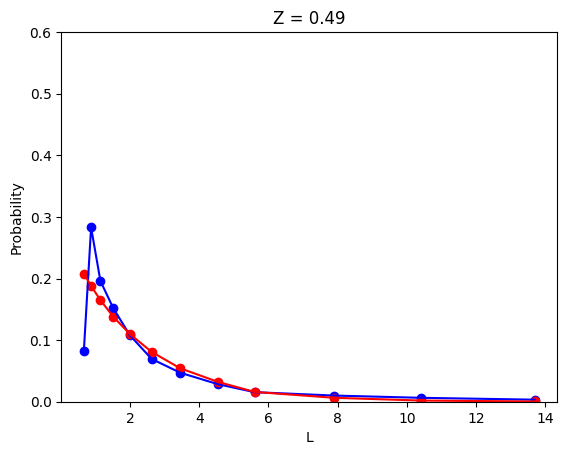

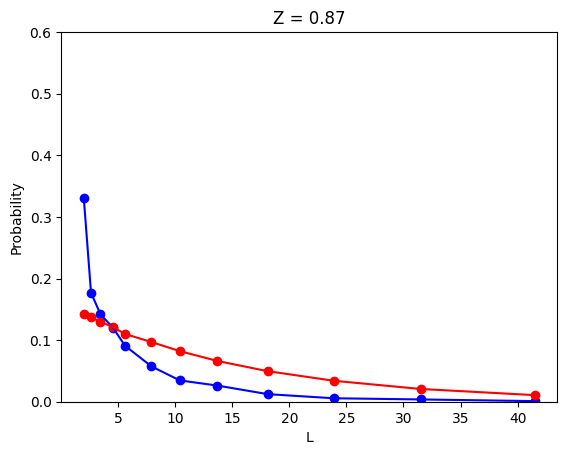

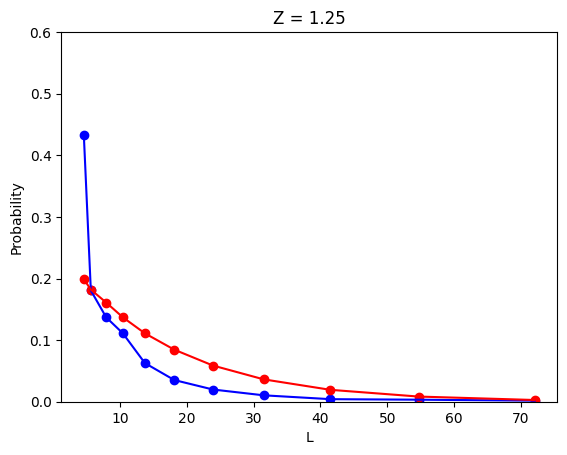

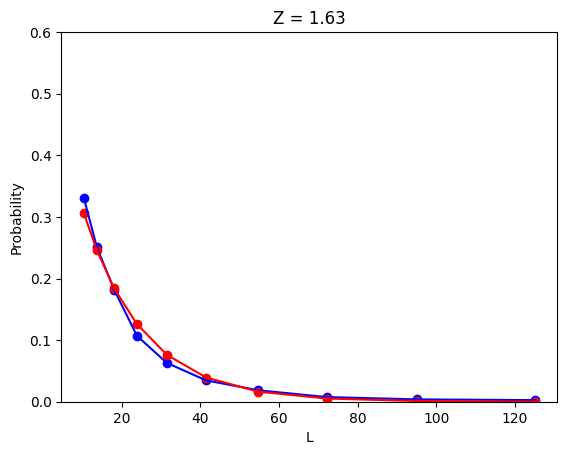

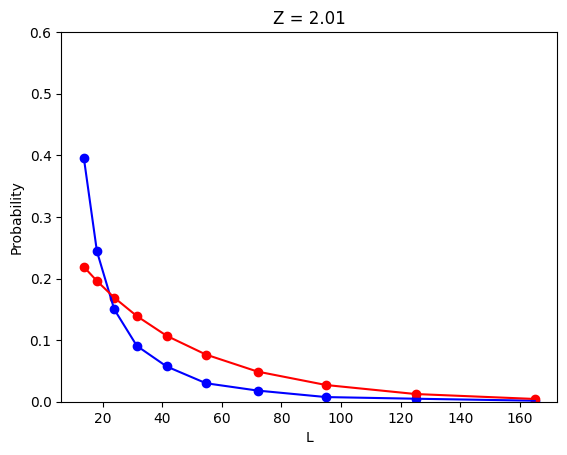

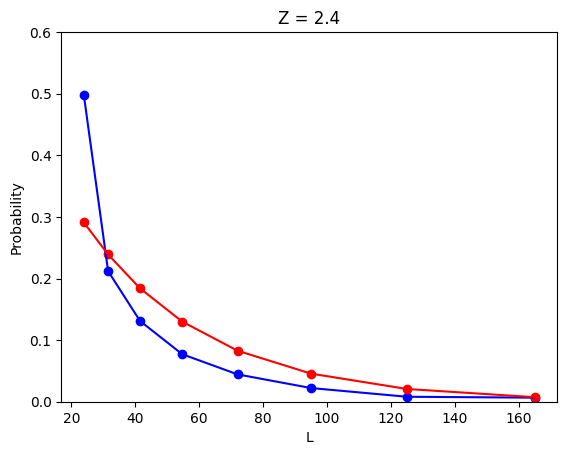

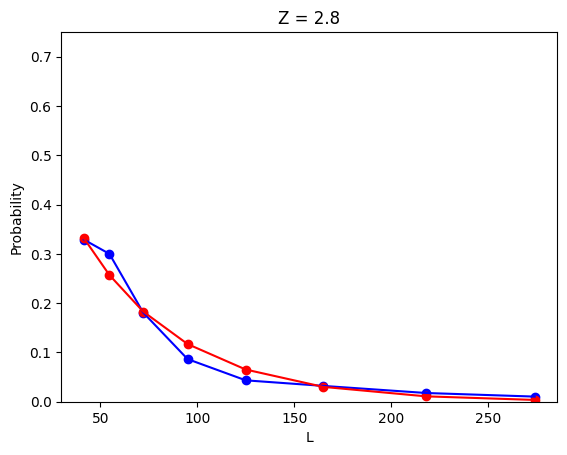

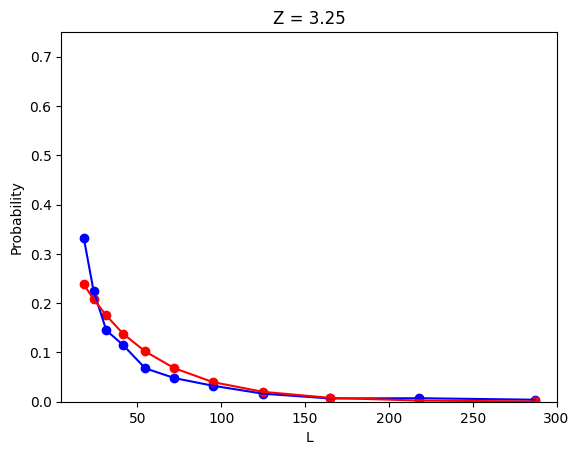

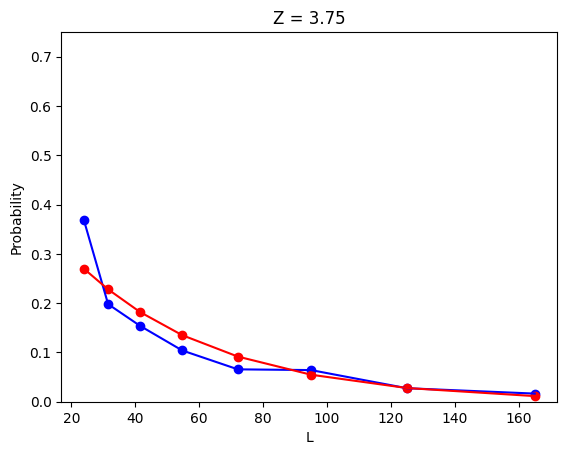

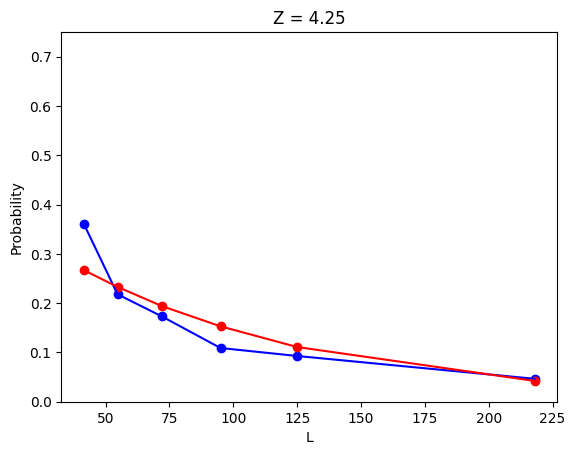

In [21]:
max_limit = 0.6
for z in Z:
    if z >= 2.8:
        max_limit = 0.75
    x = df.where(df['Z'] == z).dropna()['L(x10^30)(ergs^-1 Hz^-1)']
    y_exp = df.where(df['Z'] == z).dropna()['Probability']
    y_theo = df.where(df['Z'] == z).dropna()['Probability MaxEnt']
    plt.scatter(x, y_exp, label='Experimental', color='blue')
    plt.scatter(x, y_theo, label='Theoretical', color='red')
    plt.ylim(0, max_limit)
    plt.plot(x, y_exp, label='Experimental', color='blue')
    plt.plot(x, y_theo, label='Theoretical', color='red')
    plt.xlabel('L')
    plt.ylabel('Probability')
    plt.title('Z = ' + str(z))
    plt.show()

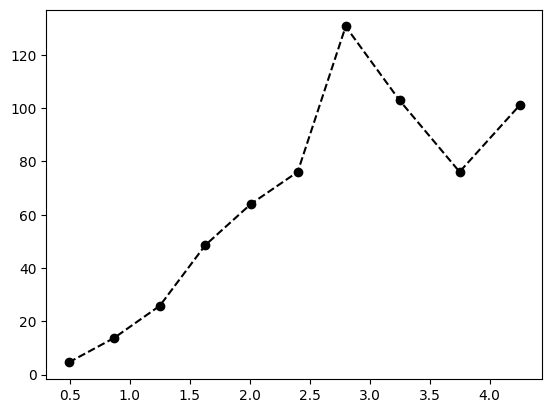

In [30]:
z = sorted(df['Z'].unique())
average_l = []
for i in range(len(z)):
    current_average = 0
    counter = 0 
    for j in range(len(df)):
        if df['Z'][j] == z[i]:
            current_average += df['L(x10^30)(ergs^-1 Hz^-1)'][j]
            counter += 1
    current_average /= counter
    average_l.append(current_average)
        
plt.scatter(z, average_l, label='Mean Luminosity Per Redshift', color='black')
plt.plot(z, average_l, color='black', linestyle='dashed')
plt.show()

### Esse está diferente. Provávelmente o método para obter a média é mais sofisticado...
Acredito que esteja descrito no apendice mas estou com alguma dificuldade de compreender. O que desenvolvi aqui foi uma lógica simples de média aritmética.